In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv('insurance.csv')
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
dataset.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [4]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
import seaborn as sns

In [6]:
dataset.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


C:\Users\hrith\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

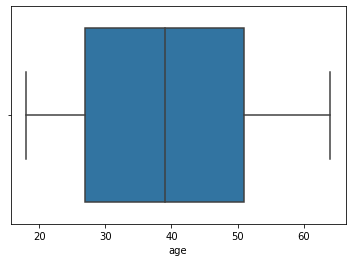

In [8]:
sns.boxplot(dataset['age'])

C:\Users\hrith\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

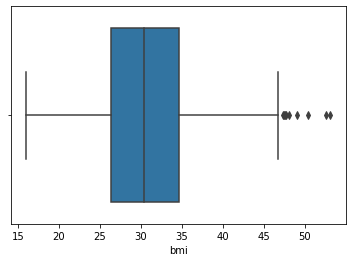

In [9]:
sns.boxplot(dataset['bmi'])

C:\Users\hrith\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='children'>

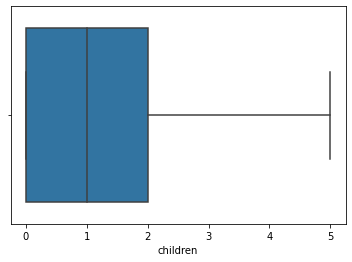

In [11]:
sns.boxplot(dataset['children'])

<AxesSubplot:>

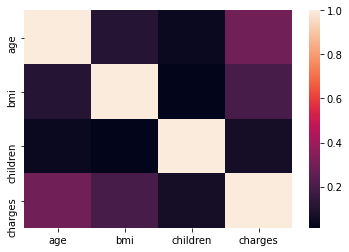

In [12]:
sns.heatmap(dataset.corr())

C:\Users\hrith\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='charges'>

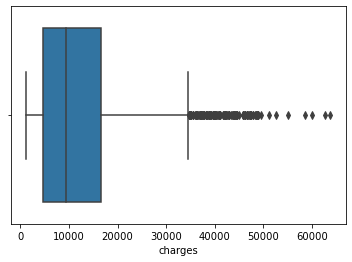

In [13]:
sns.boxplot(dataset['charges'])

In [14]:
from sklearn.compose import ColumnTransformer   #operation in columns
from sklearn.preprocessing import OneHotEncoder

In [15]:
ct=ColumnTransformer([("on",OneHotEncoder(drop='first'),[1,4,5])],remainder='passthrough')  
dataset=ct.fit_transform(dataset)
dataset

array([[0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        2.79000000e+01, 0.00000000e+00, 1.68849240e+04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.37700000e+01, 1.00000000e+00, 1.72555230e+03],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.30000000e+01, 3.00000000e+00, 4.44946200e+03],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.68500000e+01, 0.00000000e+00, 1.62983350e+03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.58000000e+01, 0.00000000e+00, 2.00794500e+03],
       [0.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        2.90700000e+01, 0.00000000e+00, 2.91413603e+04]])

In [17]:
dataset.shape

(1338, 9)

In [18]:
from scipy import stats

In [19]:
z=np.abs(stats.zscore(dataset))
z

array([[1.0105187 , 1.97058663, 0.56641788, ..., 0.45332   , 0.90861367,
        0.2985838 ],
       [0.98959079, 0.5074631 , 0.56641788, ..., 0.5096211 , 0.07876719,
        0.95368917],
       [0.98959079, 0.5074631 , 0.56641788, ..., 0.38330685, 1.58092576,
        0.72867467],
       ...,
       [1.0105187 , 0.5074631 , 0.56641788, ..., 1.0148781 , 0.90861367,
        0.96159623],
       [1.0105187 , 0.5074631 , 0.56641788, ..., 0.79781341, 0.90861367,
        0.93036151],
       [1.0105187 , 1.97058663, 1.76548098, ..., 0.26138796, 0.90861367,
        1.31105347]])

In [20]:
threshold=3
np.where(z>threshold)

(array([  32,   34,   71,  116,  166,  413,  425,  438,  543,  568,  577,
         640,  819,  847,  877,  932,  937,  969,  984, 1047, 1085, 1116,
        1130, 1146, 1230, 1245, 1272, 1300, 1317], dtype=int64),
 array([7, 8, 7, 6, 7, 7, 7, 7, 8, 7, 8, 7, 8, 6, 7, 7, 7, 7, 7, 6, 7, 7,
        7, 8, 8, 7, 7, 8, 6], dtype=int64))

In [22]:
df_no_outlayers=dataset[(z<=3).all(axis=1)] #hot to remove outlayers
df_no_outlayers

array([[0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        2.79000000e+01, 0.00000000e+00, 1.68849240e+04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.37700000e+01, 1.00000000e+00, 1.72555230e+03],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.30000000e+01, 3.00000000e+00, 4.44946200e+03],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.68500000e+01, 0.00000000e+00, 1.62983350e+03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.58000000e+01, 0.00000000e+00, 2.00794500e+03],
       [0.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        2.90700000e+01, 0.00000000e+00, 2.91413603e+04]])

In [24]:
df_no_outlayers.shape

(1309, 9)

In [25]:
df_no_outlayers[0]

array([0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       1.0000000e+00, 1.9000000e+01, 2.7900000e+01, 0.0000000e+00,
       1.6884924e+04])

In [26]:
x=df_no_outlayers[:,0:8]
y=df_no_outlayers[:,-1]

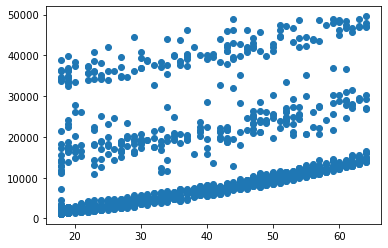

In [28]:
plt.scatter(x[:,5],y)

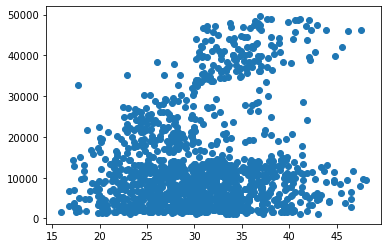

In [29]:
plt.scatter(x[:,6],y)

In [30]:
from sklearn.preprocessing import StandardScaler#bringing all single values in a smaller range#linear models
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-1.00536197,  1.98484827, -0.57117522, ..., -1.43906316,
        -0.44935891, -0.92961644],
       [ 0.99466663, -0.50381685, -0.57117522, ..., -1.5100858 ,
         0.53339072, -0.04009311],
       [ 0.99466663, -0.50381685, -0.57117522, ..., -0.79985933,
         0.40447808,  1.73895356],
       ...,
       [-1.00536197, -0.50381685, -0.57117522, ..., -1.5100858 ,
         1.04904129, -0.92961644],
       [-1.00536197, -0.50381685, -0.57117522, ..., -1.29701786,
        -0.80093884, -0.92961644],
       [-1.00536197,  1.98484827,  1.75077623, ...,  1.54388803,
        -0.25347866, -0.92961644]])

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
mr=LinearRegression()
mr.fit(x_train,y_train)

LinearRegression()

In [35]:
y_pred=mr.predict(x_test)
y_pred

array([ 2315.07126773,  3905.17086364, 14262.50792259,  7087.68662254,
       13557.2104806 , 12926.3163226 ,  3471.74542868,   531.66995661,
       15376.78741959,  5961.84042146, 11091.29900675,  1038.62627241,
        5825.27056799,  5827.45187585, 36004.67743698, 26715.64851828,
       34260.10097707,  1676.80278412,  5343.12760483, 14925.17725951,
        5569.08880672, 13698.4286511 ,  4884.00364843, 26340.93770563,
        2979.73296632,  2219.28617577,  5322.00522029,  6316.91484342,
       14662.24678614, 30452.30311078,  8799.82124754,  6715.71713562,
        4411.67047539, 10056.96538347, 12152.66169525, 14374.04834497,
       11235.80210038,  9096.41335891,  7617.90843909,  9704.08950784,
       35944.08885415, 14819.01667603,  7944.22782105, 32436.31524887,
       36080.3152829 , 11918.46039635, 14824.68234484,  9120.90572037,
       11570.72934378,  7825.22660723, 12809.86780703, 14061.97593977,
        3742.08982591, 37893.16185871,  6361.27503242, 11537.84684014,
      

In [36]:
y_test

array([ 2200.83085 ,  3056.3881  , 12643.3778  ,  4433.9159  ,
       14988.432   , 10806.839   ,  3756.6216  ,  1615.7667  ,
       13822.803   ,  4661.28635 , 27346.04207 ,  2103.08    ,
        4243.59005 ,  5472.449   , 43921.1837  , 17942.106   ,
       26109.32905 ,  2198.18985 ,  4883.866   , 13974.45555 ,
        1146.7966  , 12244.531   ,  2904.088   , 34303.1672  ,
        2104.1134  ,  2597.779   ,  2498.4144  ,  5383.536   ,
        8569.8618  , 21472.4788  ,  6238.298   ,  5152.134   ,
       14133.03775 ,  9225.2564  , 10407.08585 , 13019.16105 ,
       12124.9924  ,  8059.6791  ,  5327.40025 ,  5979.731   ,
       43813.8661  , 14692.66935 ,  5012.471   , 39983.42595 ,
       44202.6536  , 14254.6082  ,  9704.66805 ,  5138.2567  ,
       10704.47    ,  5425.02335 , 13224.693   , 11945.1327  ,
        2250.8352  , 46661.4424  ,  3659.346   , 11554.2236  ,
       37133.8982  , 40182.246   ,  3484.331   ,  1748.774   ,
       46113.511   ,  3556.9223  , 11345.519   ,  1720.

In [37]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7866370624891945

In [38]:
from sklearn.tree import DecisionTreeRegressor

In [39]:
dt=DecisionTreeRegressor(criterion='mse',max_depth=4,random_state=0)

In [40]:
dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=4, random_state=0)

In [41]:
y_pred=dt.predict(x_test)
y_pred

array([ 3399.08293847,  6792.0912807 , 15930.53185536,  6742.68423387,
       15930.53185536, 15930.53185536,  6742.68423387,  3399.08293847,
       13115.52039368,  6792.0912807 , 13115.52039368,  3399.08293847,
        6742.68423387,  6742.68423387, 44818.19863318, 19127.51002237,
       27504.9707155 ,  3399.08293847,  6742.68423387, 13115.52039368,
        3399.08293847, 13115.52039368,  3399.08293847, 39090.66781793,
        3399.08293847,  3399.08293847,  3399.08293847,  6742.68423387,
       10021.83705693, 19127.51002237,  6742.68423387,  6742.68423387,
        3399.08293847, 11466.85856919, 10021.83705693, 13115.52039368,
       13115.52039368,  6742.68423387,  6742.68423387,  6742.68423387,
       44818.19863318, 13115.52039368,  6742.68423387, 39090.66781793,
       44818.19863318, 13115.52039368,  8785.35839587,  6742.68423387,
       13115.52039368,  6742.68423387, 13115.52039368, 13115.52039368,
        3399.08293847, 44818.19863318,  6742.68423387, 13115.52039368,
      

In [42]:
r2_score(y_test,y_pred)

0.8631038220576144

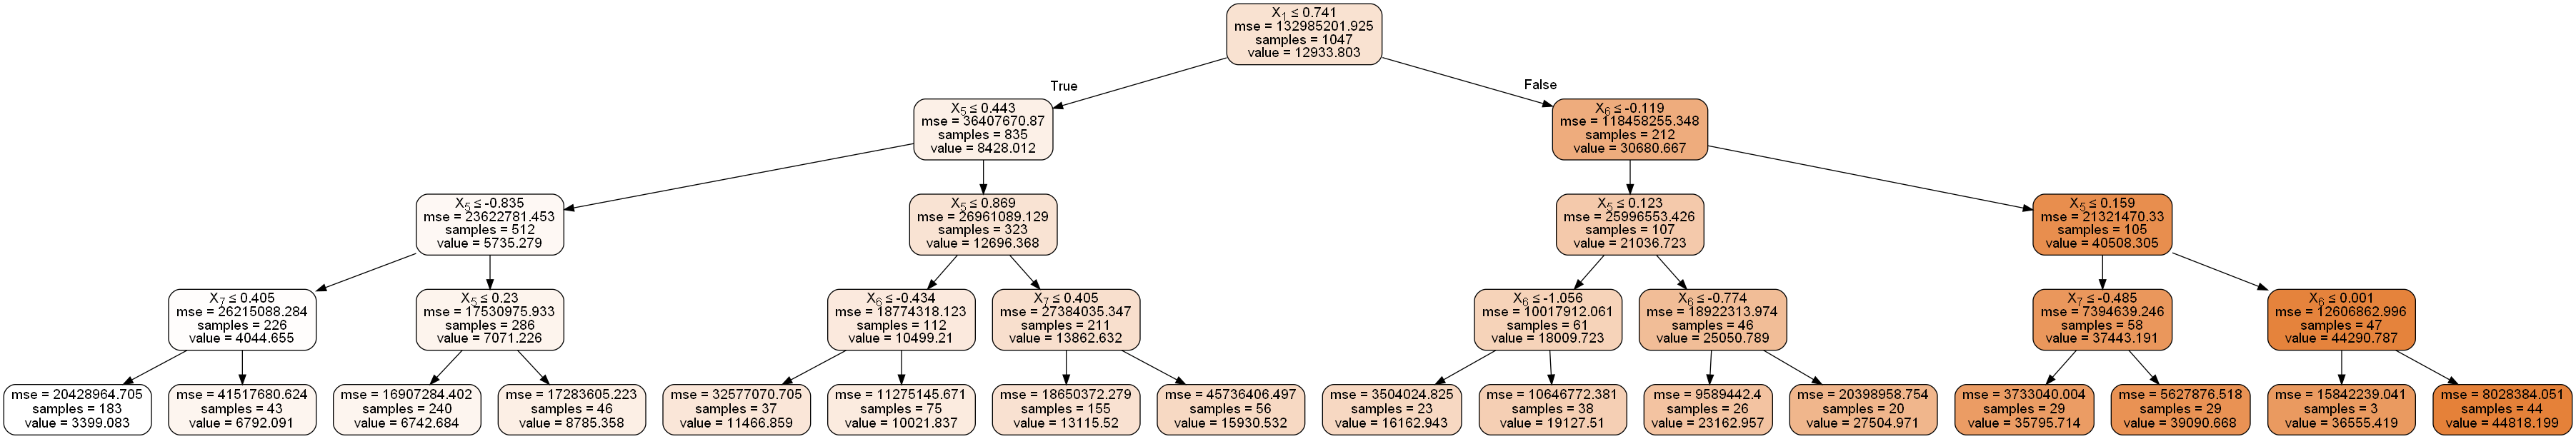

In [43]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data=StringIO()
export_graphviz(dt,out_file=dot_data,filled=True,rounded=True,special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())